# Basketball performance

### Imports

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split, cross_val_score

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score

In [24]:
basketball_df = pd.read_csv('basketball_performance.csv')
basketball_df

,Unnamed: 0,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,...,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1336,1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,...,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1337,1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,...,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1338,1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,...,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


In [25]:
basketball_df.shape

(1340, 21)

In [26]:
basketball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1340 non-null   int64  
 1   Name               1340 non-null   object 
 2   GamesPlayed        1340 non-null   int64  
 3   MinutesPlayed      1340 non-null   float64
 4   PointsPerGame      1340 non-null   float64
 5   FieldGoalsMade     1340 non-null   float64
 6   FieldGoalsAttempt  1340 non-null   float64
 7   FieldGoalPercent   1340 non-null   float64
 8   3PointMade         1340 non-null   float64
 9   3PointAttempt      1340 non-null   float64
 10  3PointPercent      1329 non-null   float64
 11  FreeThrowMade      1340 non-null   float64
 12  FreeThrowAttempt   1340 non-null   float64
 13  FreeThrowPercent   1340 non-null   float64
 14  OffensiveRebounds  1340 non-null   float64
 15  DefensiveRebounds  1340 non-null   float64
 16  Rebounds           1340 

In [27]:
basketball_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1340.0,669.500000,386.968991,0.0,334.750,669.50,1004.25,1339.0
GamesPlayed,1340.0,60.414179,17.433992,11.0,47.000,63.00,77.00,82.0
MinutesPlayed,1340.0,17.624627,8.307964,3.1,10.875,16.10,22.90,40.9
PointsPerGame,1340.0,6.801493,4.357545,0.7,3.700,5.55,8.80,28.2
FieldGoalsMade,1340.0,2.629104,1.683555,0.3,1.400,2.10,3.40,10.2
FieldGoalsAttempt,1340.0,5.885299,3.593488,0.8,3.300,4.80,7.50,19.8
FieldGoalPercent,1340.0,44.169403,6.137679,23.8,40.200,44.10,47.90,73.7
3PointMade,1340.0,0.247612,0.383688,0.0,0.000,0.10,0.40,2.3
3PointAttempt,1340.0,0.779179,1.061847,0.0,0.000,0.30,1.20,6.5
3PointPercent,1329.0,19.308126,16.022916,0.0,0.000,22.40,32.50,100.0


In [28]:
basketball_df.isna().sum()

Unnamed: 0            0
Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
3PointMade            0
3PointAttempt         0
3PointPercent        11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
dtype: int64

In [29]:
basketball_df['3PointPercent'] = basketball_df['3PointPercent'].fillna(basketball_df['3PointPercent'].mean())
basketball_df.isna().sum()

Unnamed: 0           0
Name                 0
GamesPlayed          0
MinutesPlayed        0
PointsPerGame        0
FieldGoalsMade       0
FieldGoalsAttempt    0
FieldGoalPercent     0
3PointMade           0
3PointAttempt        0
3PointPercent        0
FreeThrowMade        0
FreeThrowAttempt     0
FreeThrowPercent     0
OffensiveRebounds    0
DefensiveRebounds    0
Rebounds             0
Assists              0
Steals               0
Blocks               0
Turnovers            0
dtype: int64

In [30]:
basketball_df.duplicated().sum()

0

In [31]:
def plot_boxplots(df):
    for column in df.columns:
        plt.figure()
        sns.boxplot(y=df[column])
        plt.title(column)
        plt.show()

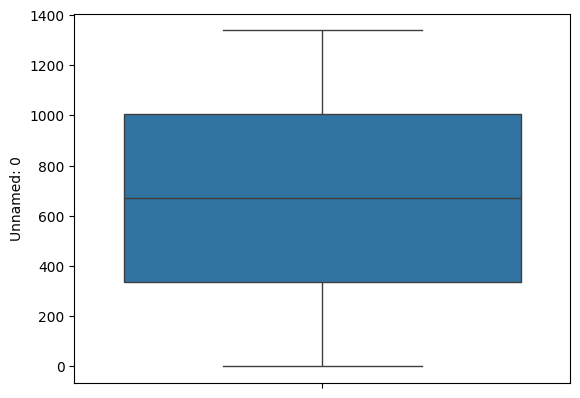

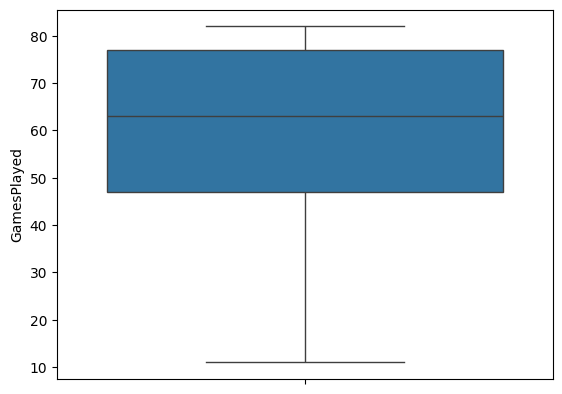

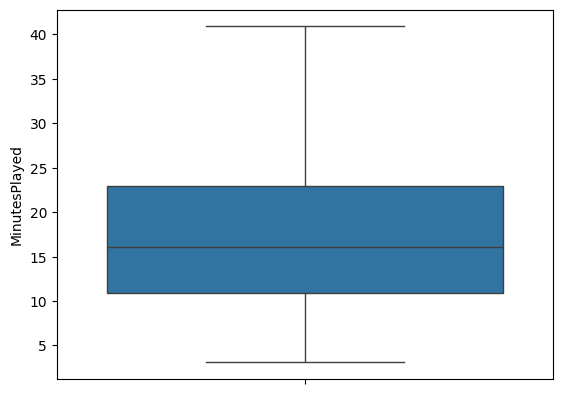

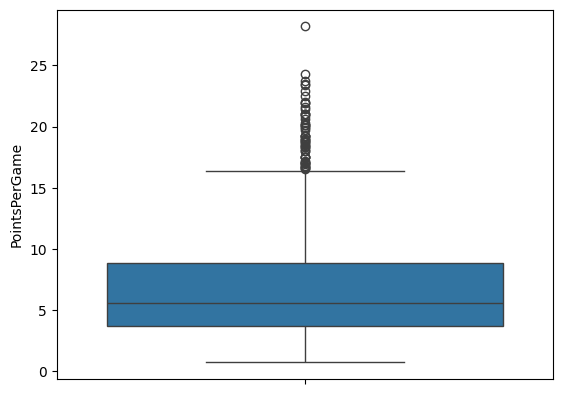

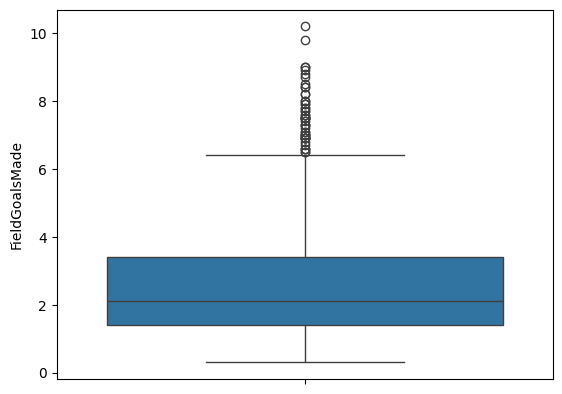

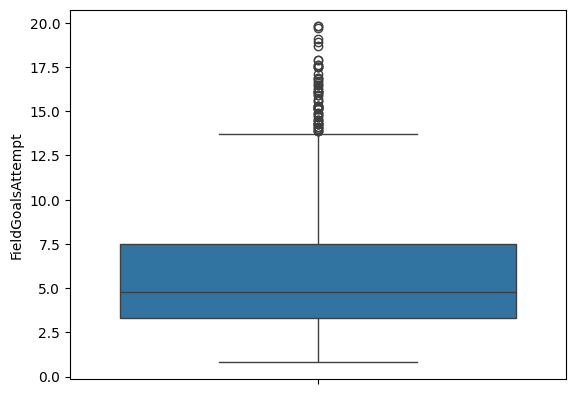

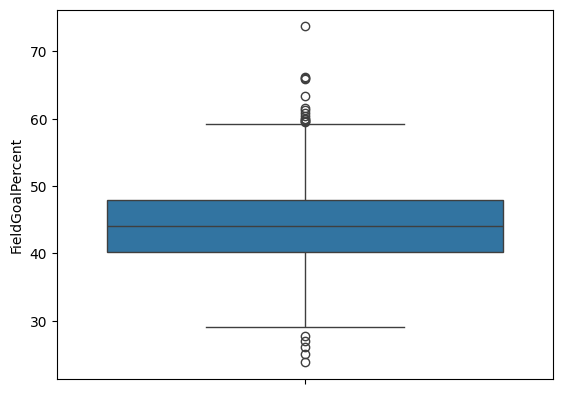

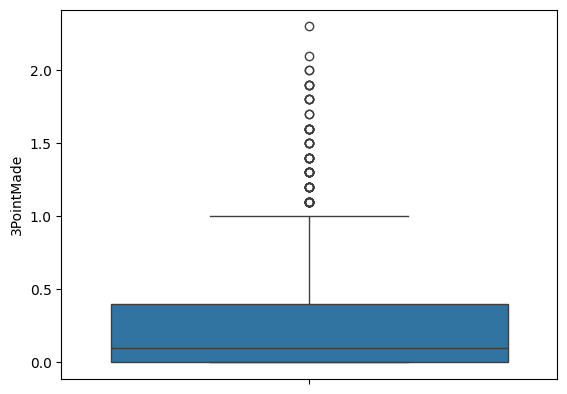

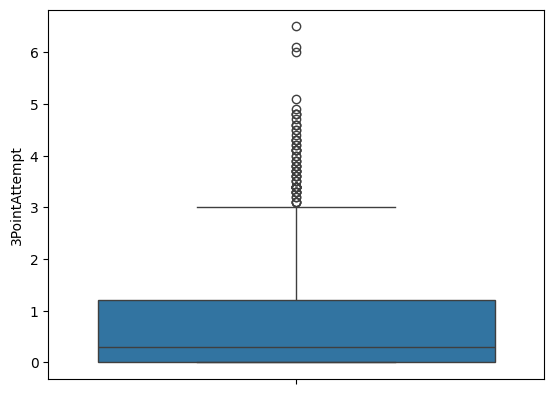

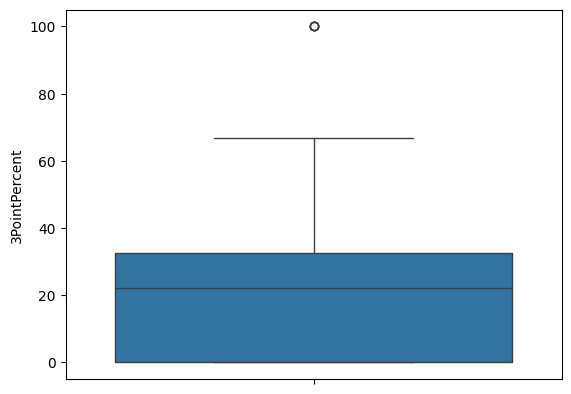

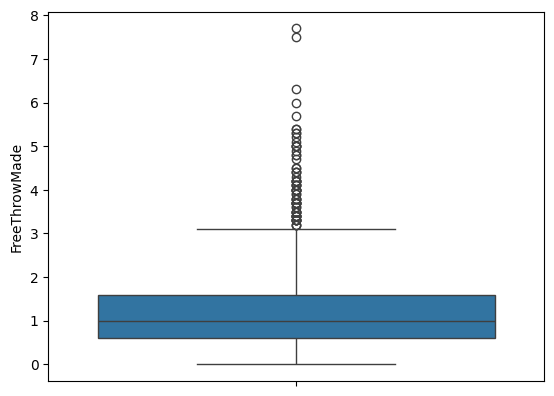

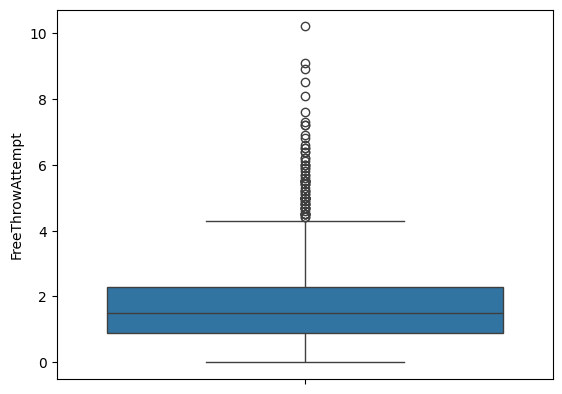

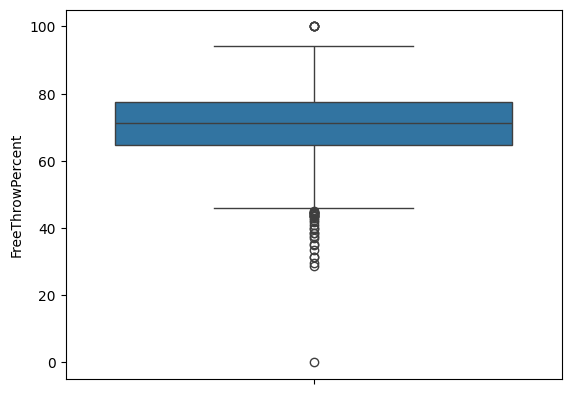

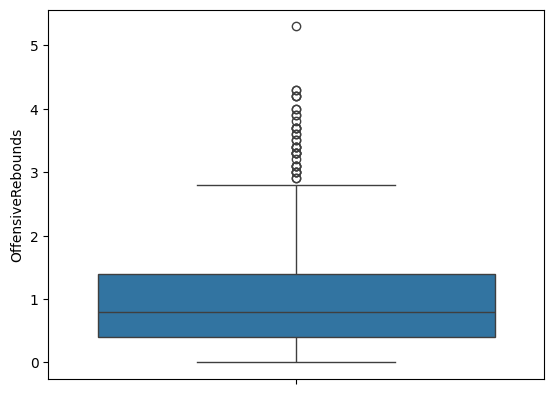

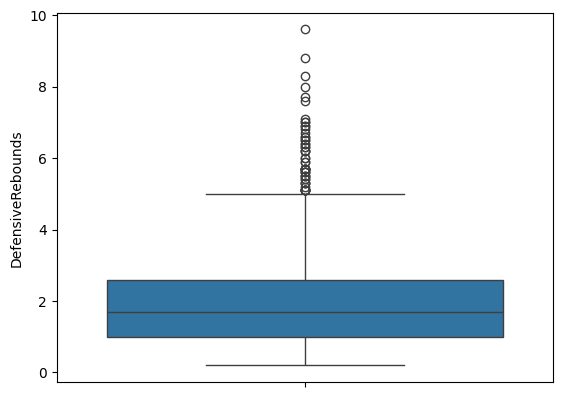

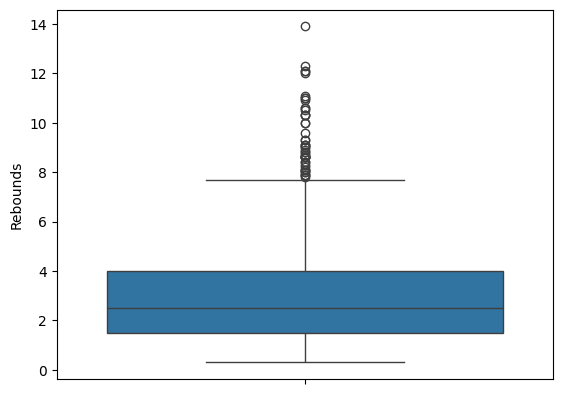

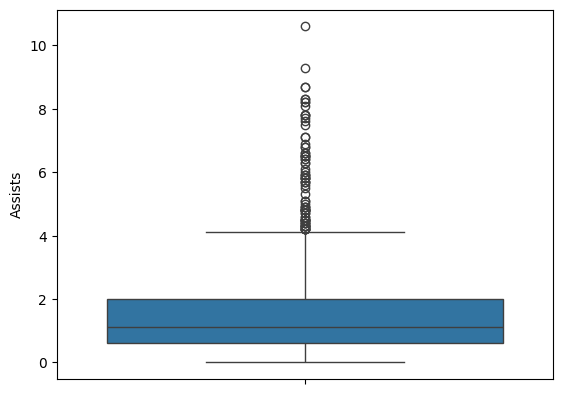

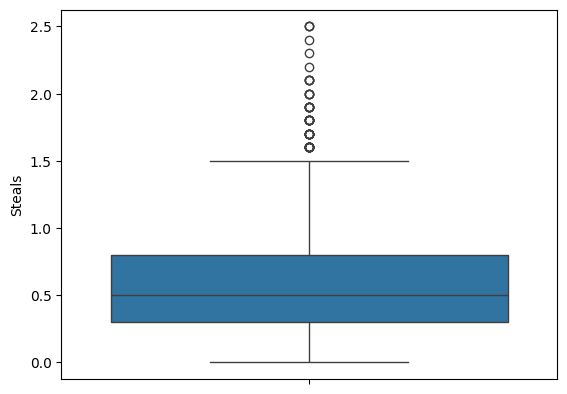

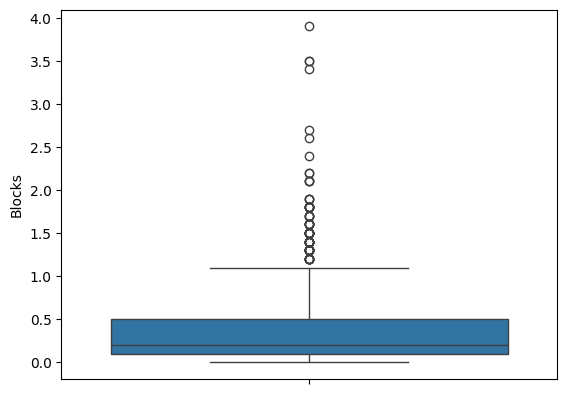

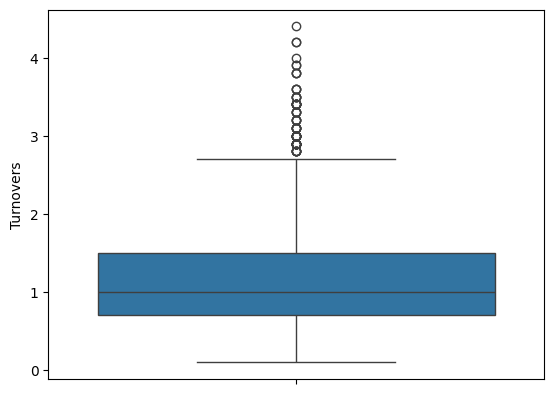

In [32]:
columns = basketball_df.columns
columns = columns.drop('Name')

for c in columns:
    sns.boxplot(basketball_df[c])
    plt.show()

In [33]:
basketball_df = basketball_df.drop(["Name"], axis=1)

basketball_df = basketball_df.drop(["Unnamed: 0"], axis=1)


### Outlier detection / removal

In [34]:
Q1 = basketball_df[basketball_df.columns].quantile(0.25)
Q3 = basketball_df[basketball_df.columns].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_cols = basketball_df.columns

outliers = ((basketball_df[df_cols] < lower_limit) | (basketball_df[df_cols] > upper_limit)).sum()

print("Count outliers by columns:")
print(outliers)


Count outliers by columns:
GamesPlayed           0
MinutesPlayed         0
PointsPerGame        58
FieldGoalsMade       52
FieldGoalsAttempt    63
FieldGoalPercent     19
3PointMade           71
3PointAttempt        68
3PointPercent         4
FreeThrowMade        74
FreeThrowAttempt     76
FreeThrowPercent     36
OffensiveRebounds    39
DefensiveRebounds    53
Rebounds             48
Assists              83
Steals               57
Blocks               75
Turnovers            67
dtype: int64


In [35]:

cleaned_data = basketball_df[~((basketball_df[df_cols] < lower_limit) | (basketball_df[df_cols] > upper_limit)).any(axis=1)]

cleaned_data.reset_index(drop=True, inplace=True)

cleaned_data

basketball_df = cleaned_data.copy()


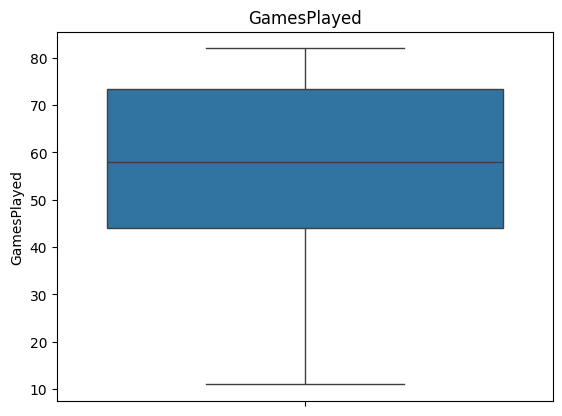

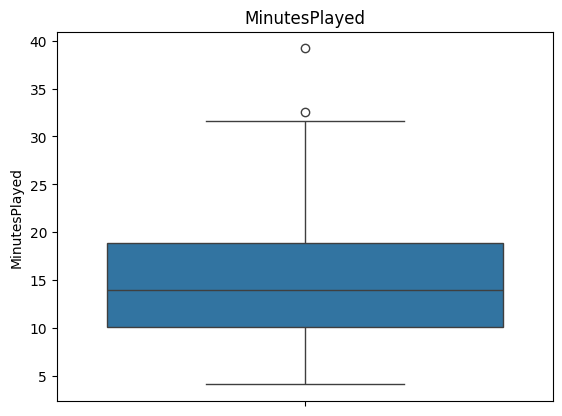

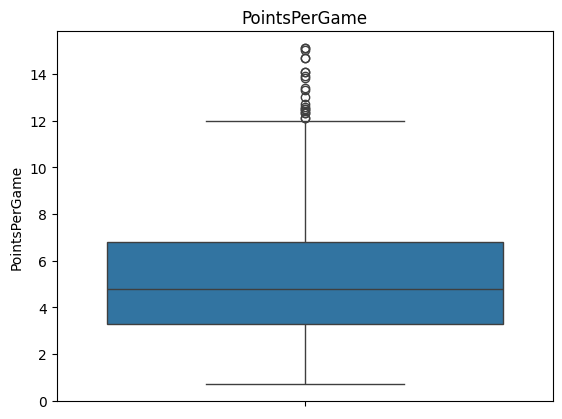

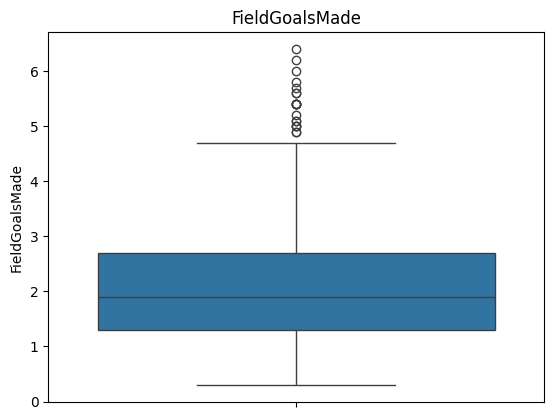

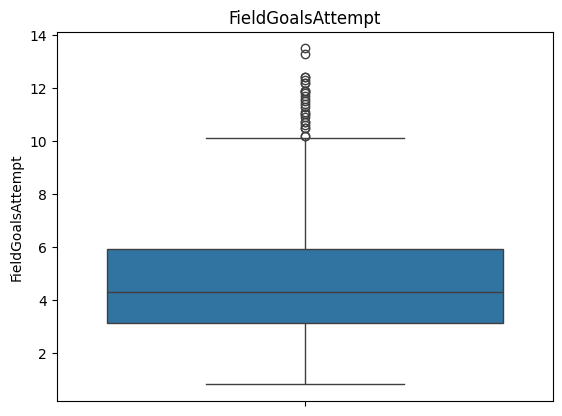

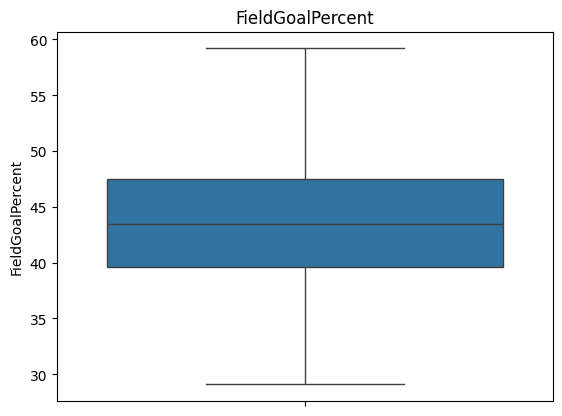

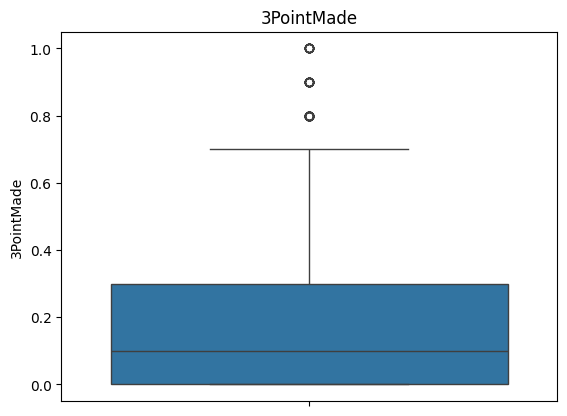

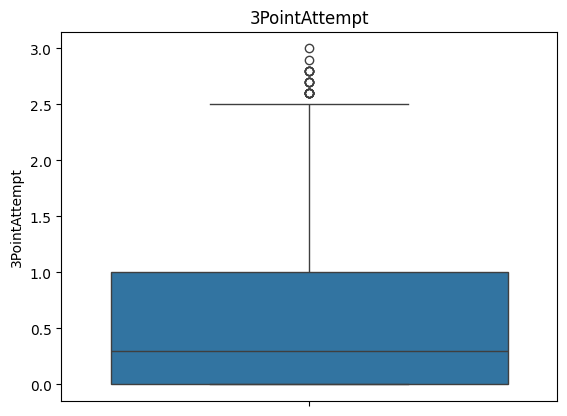

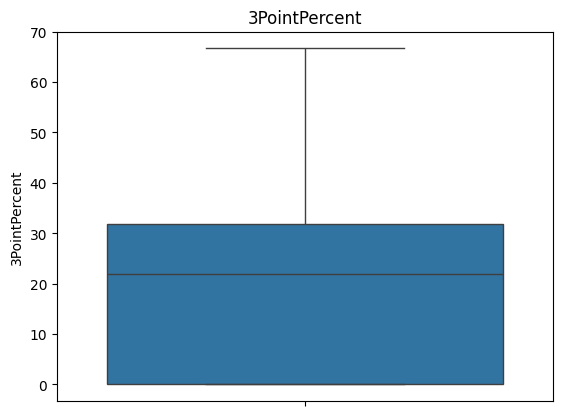

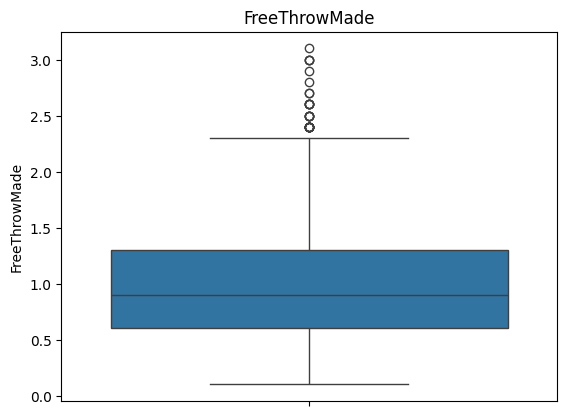

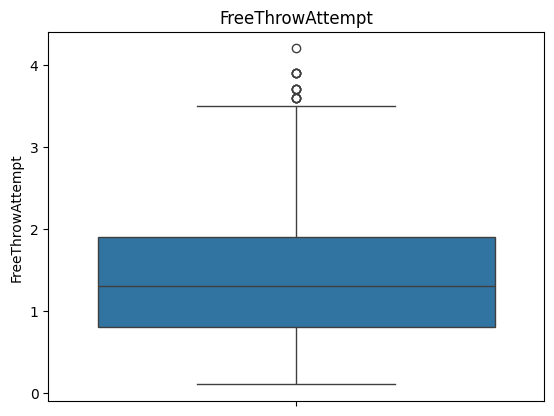

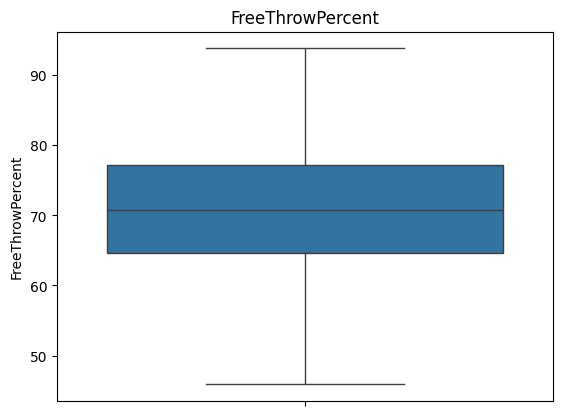

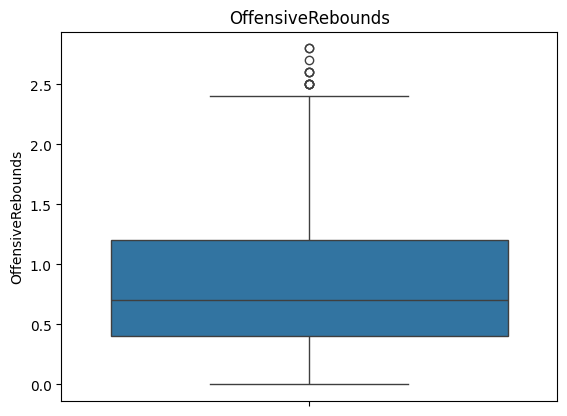

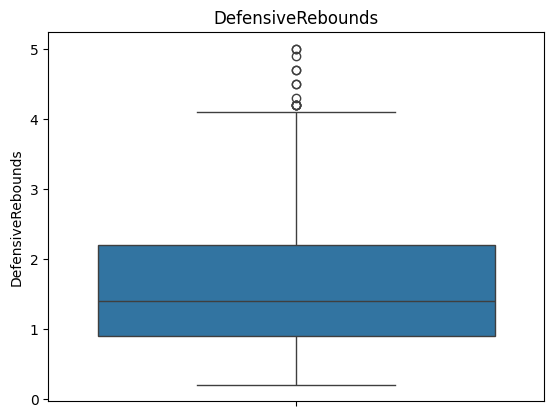

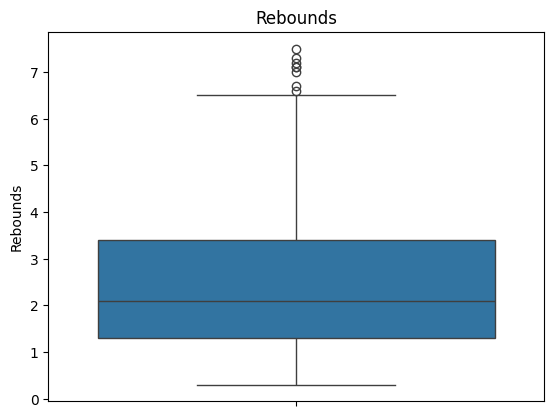

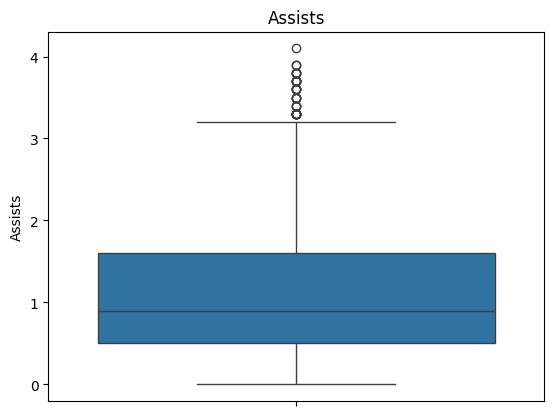

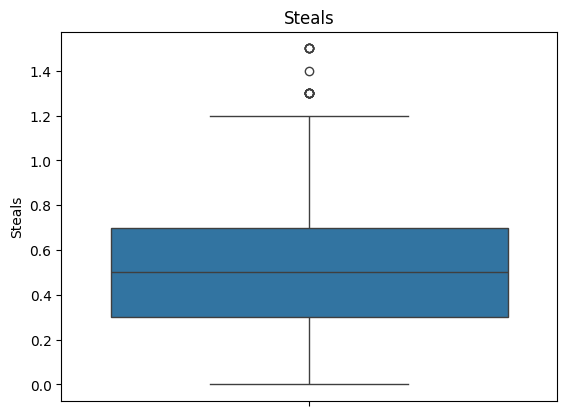

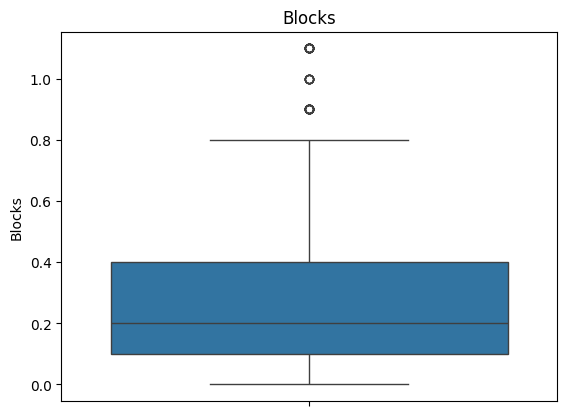

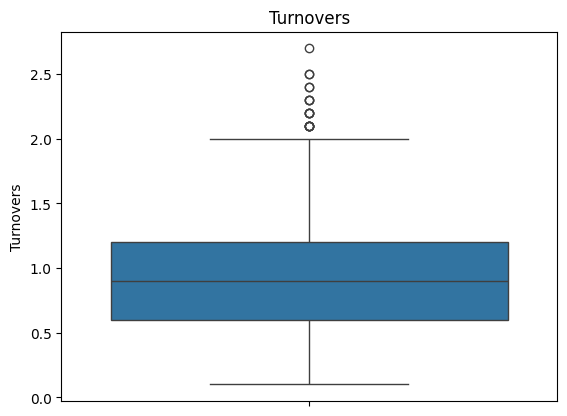

In [36]:
plot_boxplots(cleaned_data)

### Dependency analysis and visualizing

#### Correlation matrix
- With this diagram we can see correlation between 2 variables.
- This variables which are with correlation coefficients close to 1 or -1 are highly correlated which means that these varaibles have a relationship
on the diagram this variables are with red shade.



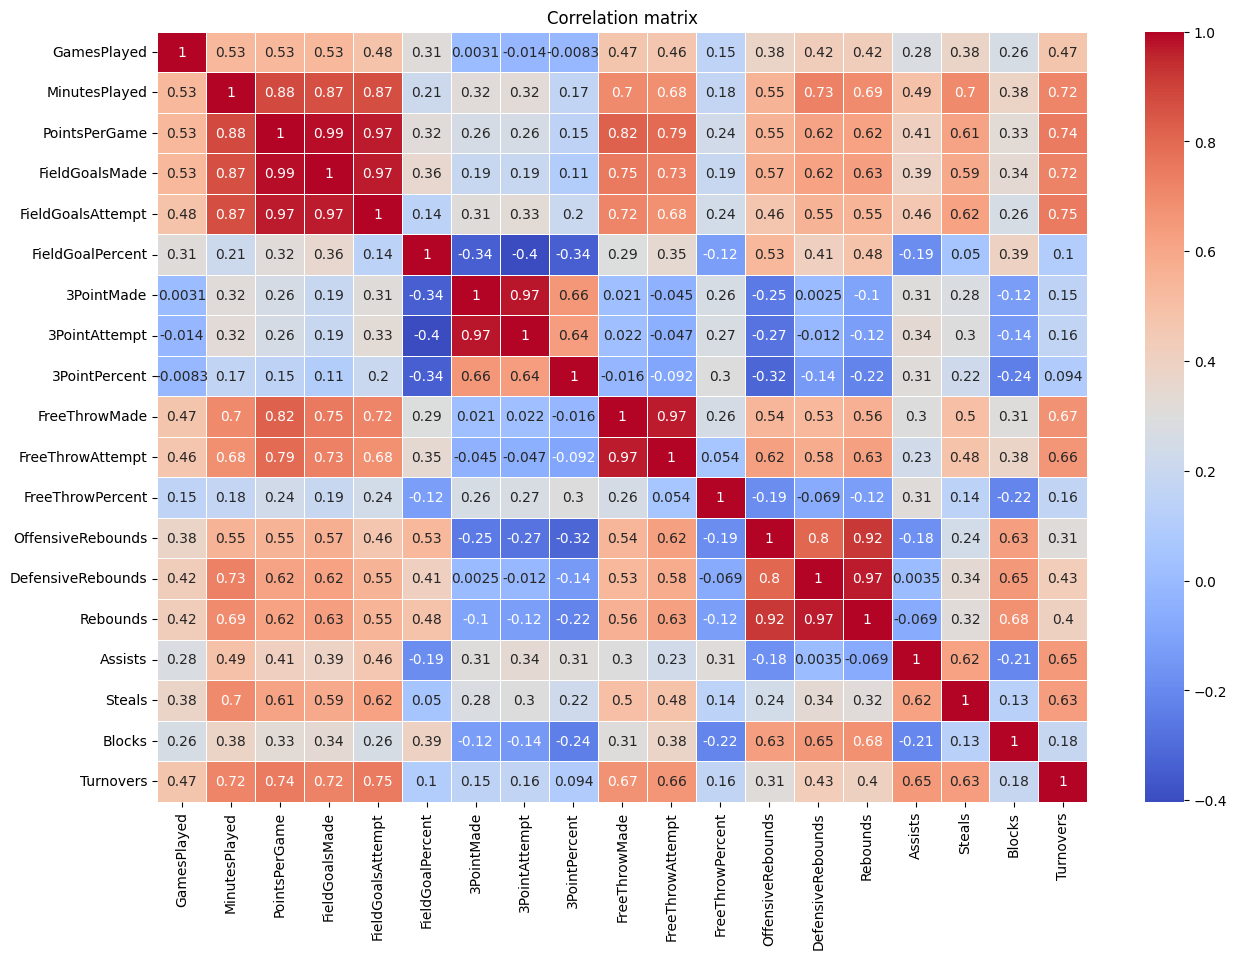

In [37]:
corr_matrix = basketball_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

### Average points per game

- From this diagram we can see that distribution of this column is somewhat normally, but is skewed to the right.
- ~500 players scored 3-5 average points per game

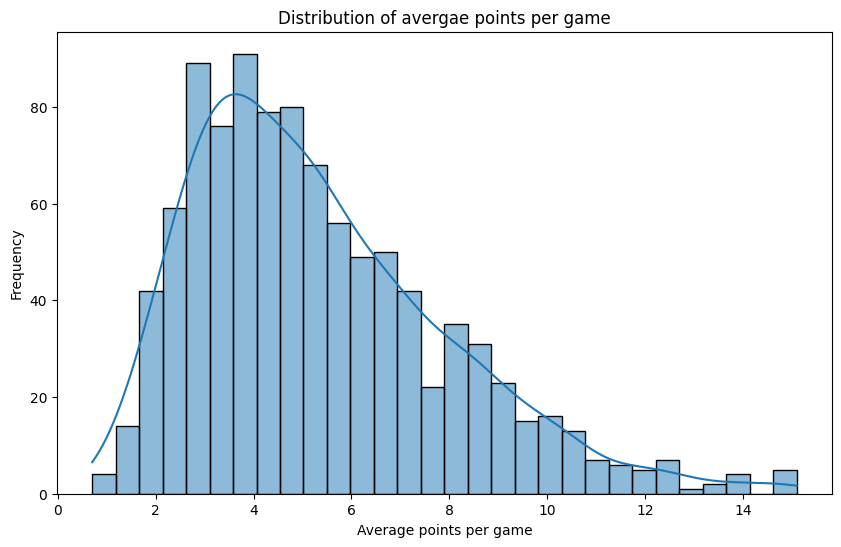

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(basketball_df['PointsPerGame'], bins=30, kde=True)
plt.title('Distribution of avergae points per game')
plt.xlabel('Average points per game')
plt.ylabel('Frequency')
plt.show()


### Played games vs average points per game

- There is a noticeable trend that players who have played more games generally score more points on average per game.
- There is positive trend which shows that as playere gain more experince and more played games, they tend to improve their scoring ability.

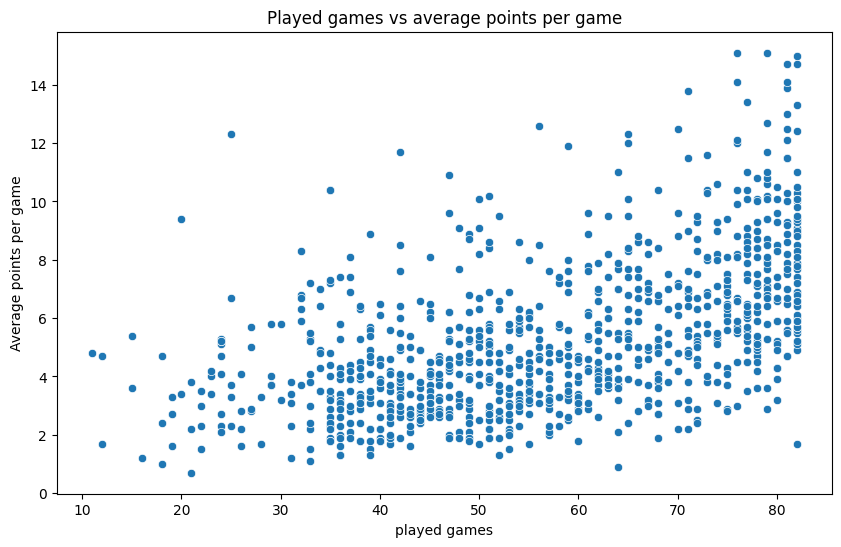

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GamesPlayed', y='PointsPerGame', data=basketball_df)
plt.title('Played games vs average points per game')
plt.xlabel('played games')
plt.ylabel('Average points per game')
plt.show()

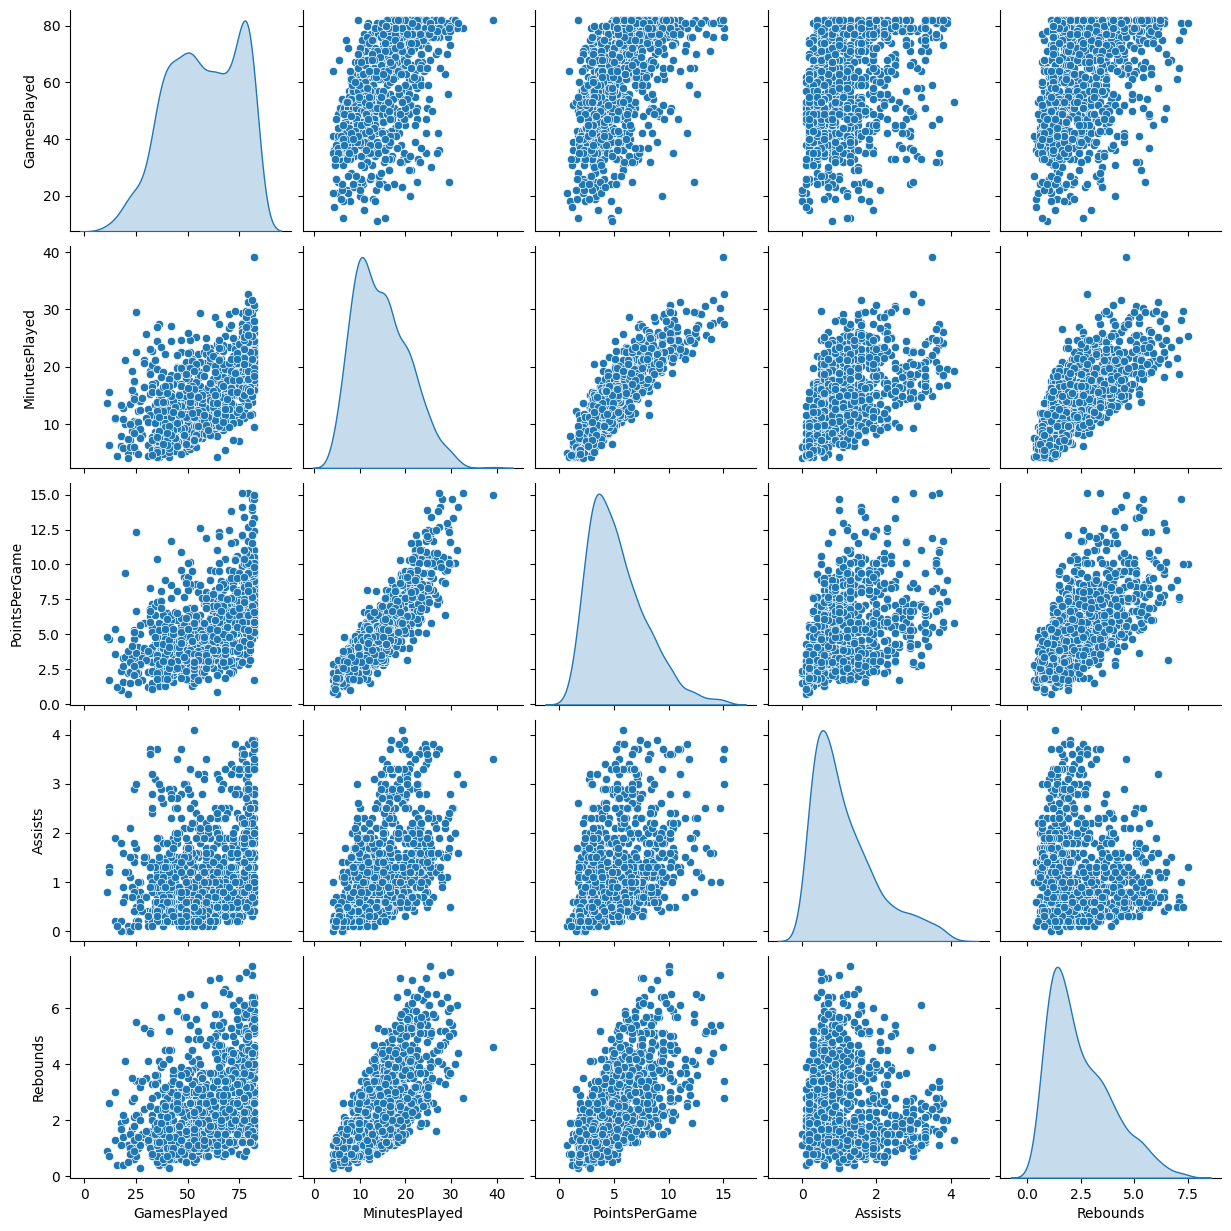

In [40]:
selected_columns = ['GamesPlayed', 'MinutesPlayed', 'PointsPerGame', 'Assists', 'Rebounds']

sns.pairplot(basketball_df[selected_columns], diag_kind='kde')
plt.show()

### Field Goals Made vs Field Goals Attempt

- From this chart we can see that approximately every second attempt is successful.

<Axes: xlabel='FieldGoalsMade', ylabel='FieldGoalsAttempt'>

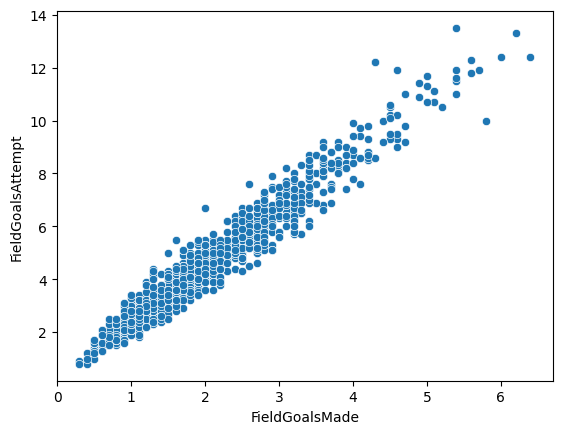

In [41]:
sns.scatterplot(x='FieldGoalsMade', y='FieldGoalsAttempt', data=basketball_df)

### Free Throw Attempt vs Free Throw Made

- We can see that ~90% from the attempts are successful

<Axes: xlabel='FreeThrowAttempt', ylabel='FreeThrowMade'>

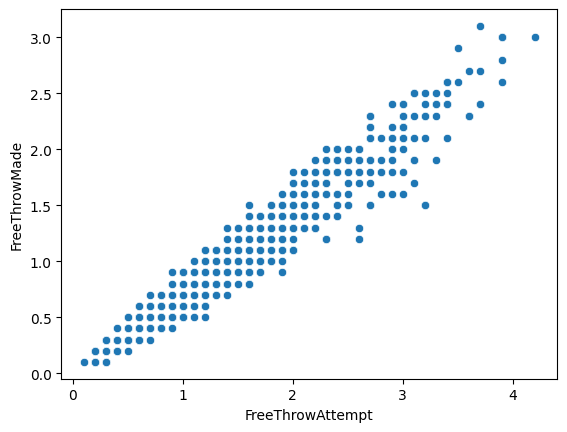

In [42]:
sns.scatterplot(x='FreeThrowAttempt', y='FreeThrowMade', data=basketball_df)

### Points per game over time

- We see that as the games played increase, the player gains more experience and the game points also increase

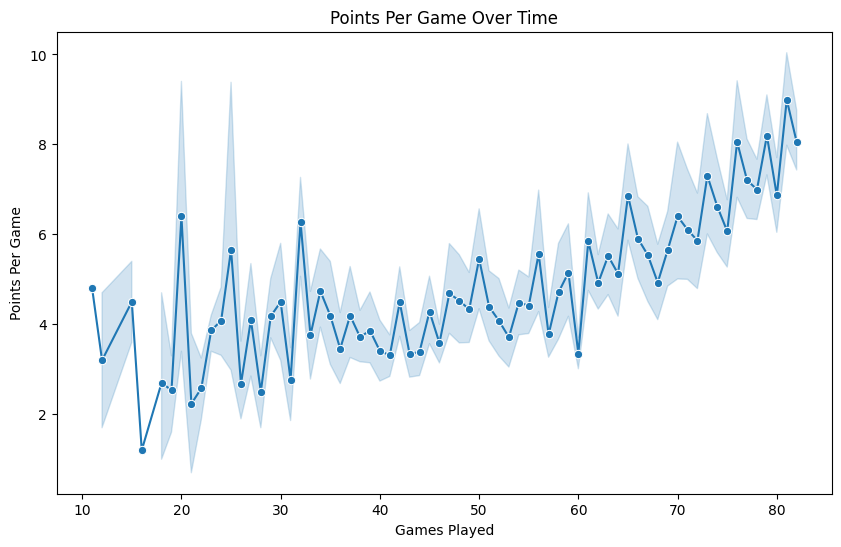

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='GamesPlayed', y='PointsPerGame', data=basketball_df, marker='o')
plt.title('Points Per Game Over Time')
plt.xlabel('Games Played')
plt.ylabel('Points Per Game')
plt.show()

### Dendogram

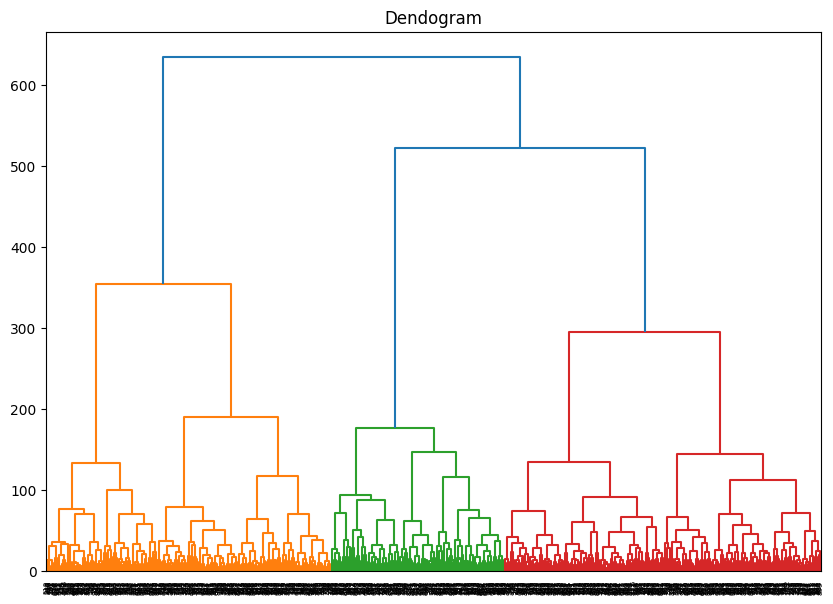

In [44]:
plt.figure(figsize=(10, 7))
plt.title('Dendogram')
Z = linkage(basketball_df, method='ward')
dend = dendrogram(Z)
plt.show()


### Cluster algorithms without scaling data (Before scaling)

- It seems that there is no sagnificant difference between scaled data and not scaled data

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(basketball_df)

basketball_pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

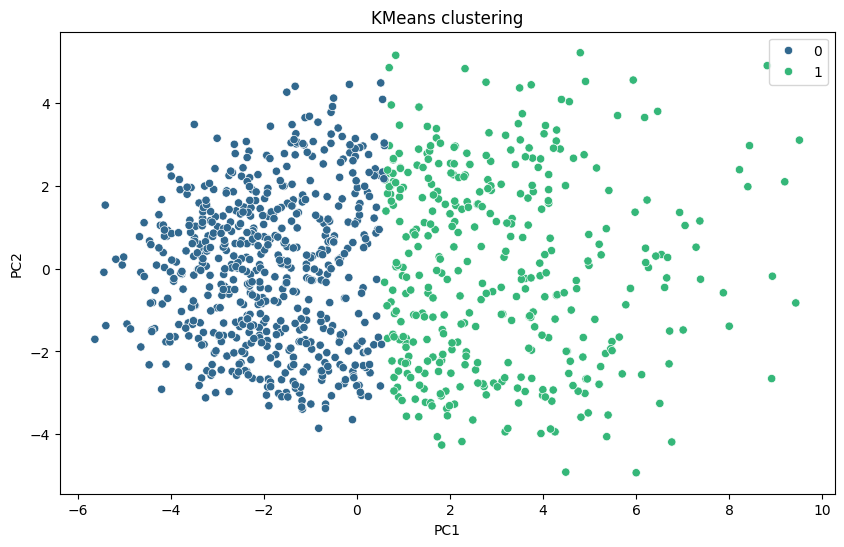

In [69]:
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(basketball_pca_df)

preds_kmeans = kmeans_model.predict(basketball_pca_df) 

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=basketball_pca_df, hue=preds_kmeans, palette='viridis')
plt.title('KMeans clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

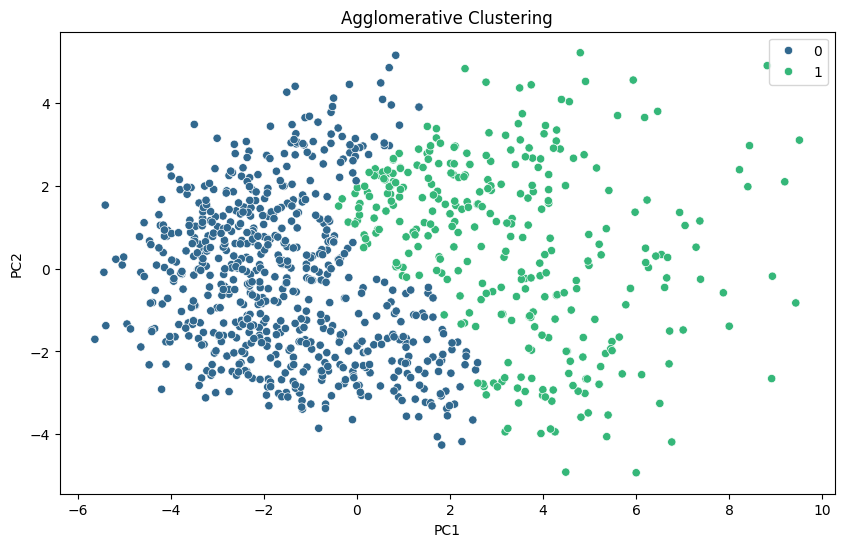

In [70]:
agg_models = AgglomerativeClustering(n_clusters=2)
agg_models.fit(basketball_pca_df)

preds_agg = agg_models.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=basketball_pca_df, hue=preds_agg, palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

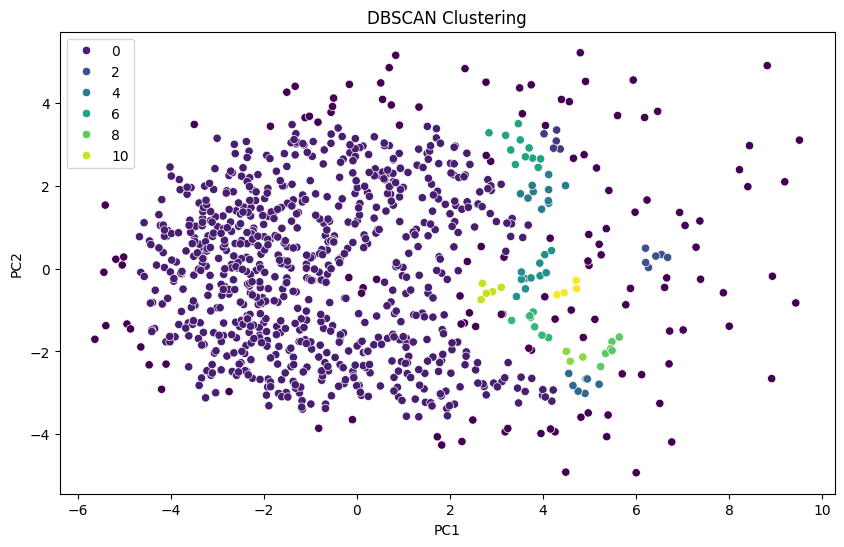

In [71]:
dbscan_model = DBSCAN(eps=0.4)
dbscan_model.fit(basketball_pca_df)

preds_dbscan = dbscan_model.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=basketball_pca_df, hue=preds_dbscan, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

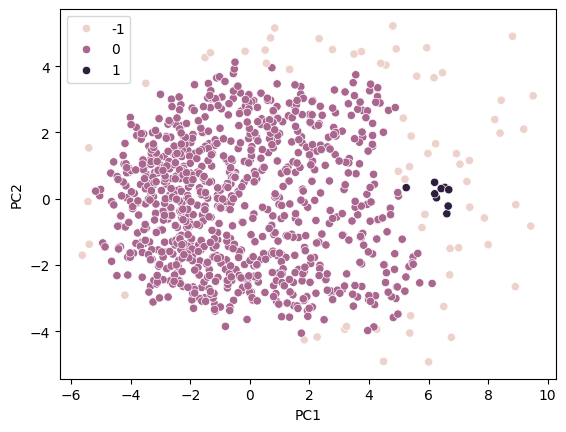

In [72]:
hdbscan_model = HDBSCAN(min_samples=10)

hdbscan_model.fit(basketball_pca_df)
preds_hdbscan = hdbscan_model.labels_

sns.scatterplot(x='PC1', y='PC2', data=basketball_pca_df, hue=preds_hdbscan)

### Dimensionality reduction with scaled data (PCA)

In [45]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(basketball_df)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

basketball_pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

In [46]:
basketball_pca_df

,PC1,PC2
0,2.885485,1.893132
1,3.744935,4.441575
2,0.008536,1.160790
3,-0.404120,0.216877
4,-0.640032,-2.400236
...,...,...
986,-0.499605,0.644206
987,-0.888030,1.807247
988,0.244576,-3.085764
989,-1.493216,0.182417


In [47]:
basketball_pca_df.shape

(991, 2)

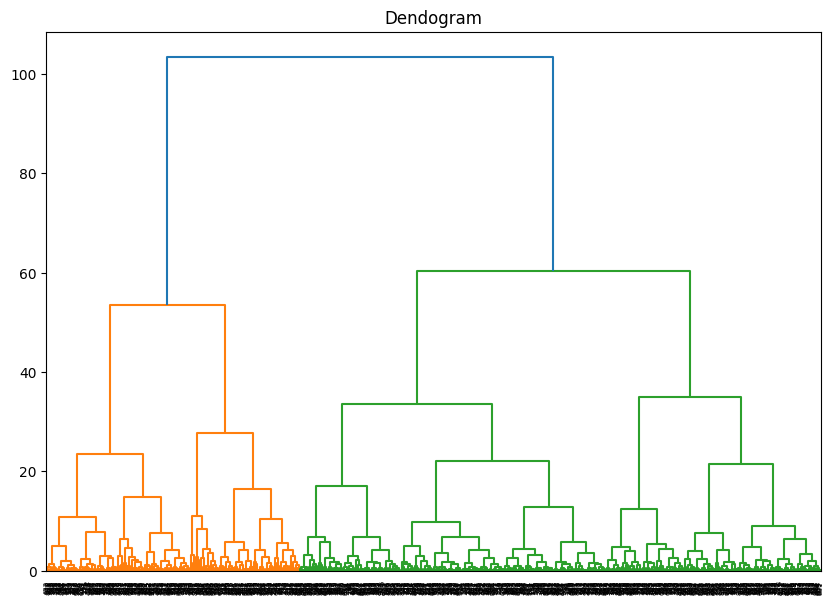

In [48]:
plt.figure(figsize=(10, 7))
plt.title('Dendogram')
Z = linkage(basketball_pca_df, method='ward')
dend = dendrogram(Z)
plt.show()


<Axes: xlabel='PC1', ylabel='PC2'>

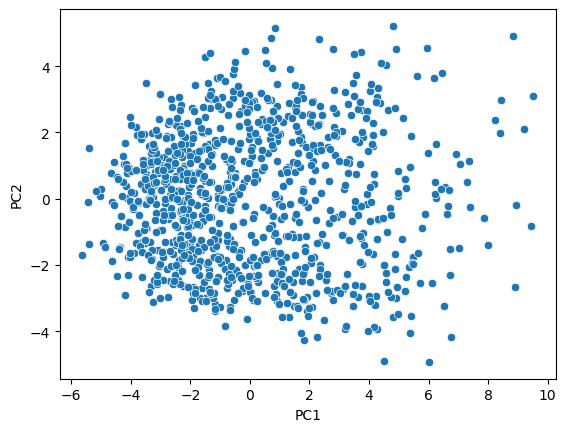

In [49]:
sns.scatterplot(x='PC1', y='PC2', data=basketball_pca_df)

### Cluster algorithms

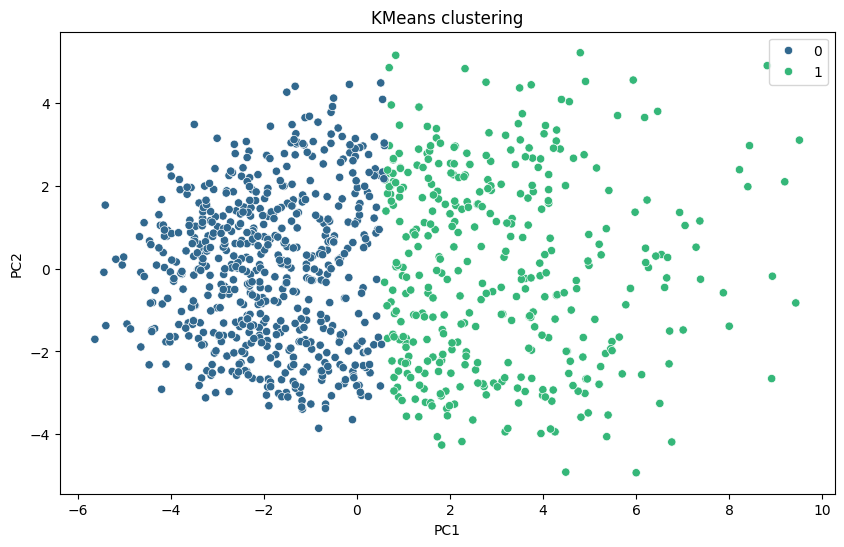

In [50]:
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(basketball_pca_df)

preds_kmeans = kmeans_model.predict(basketball_pca_df) 

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=basketball_pca_df, hue=preds_kmeans, palette='viridis')
plt.title('KMeans clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

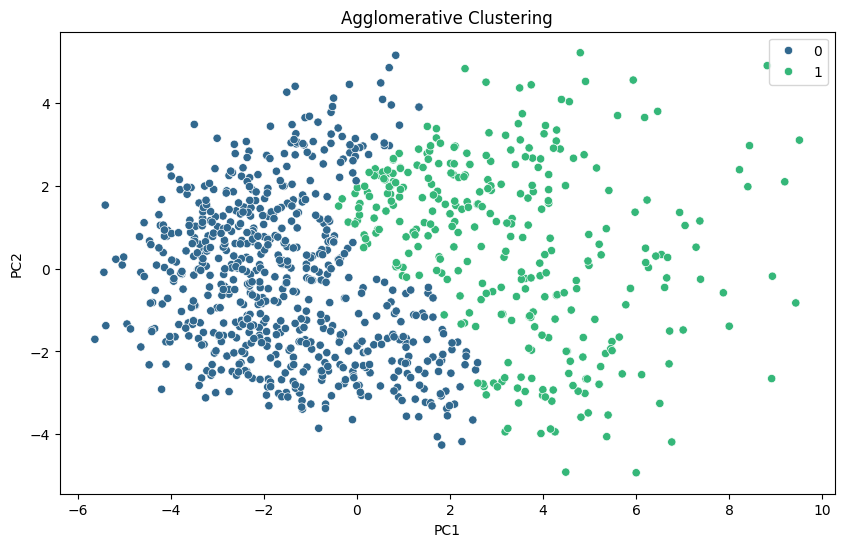

In [51]:
agg_models = AgglomerativeClustering(n_clusters=2)
agg_models.fit(basketball_pca_df)

preds_agg = agg_models.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=basketball_pca_df, hue=preds_agg, palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

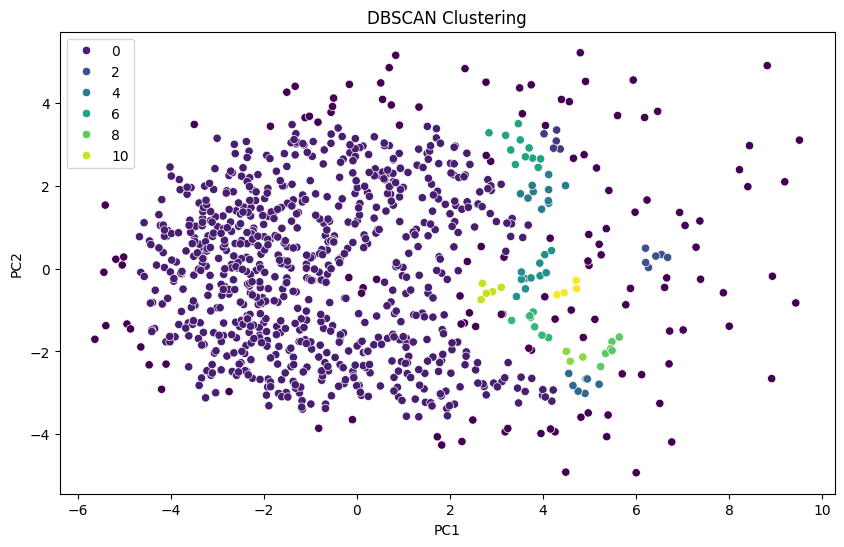

In [52]:
dbscan_model = DBSCAN(eps=0.4)
dbscan_model.fit(basketball_pca_df)

preds_dbscan = dbscan_model.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=basketball_pca_df, hue=preds_dbscan, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

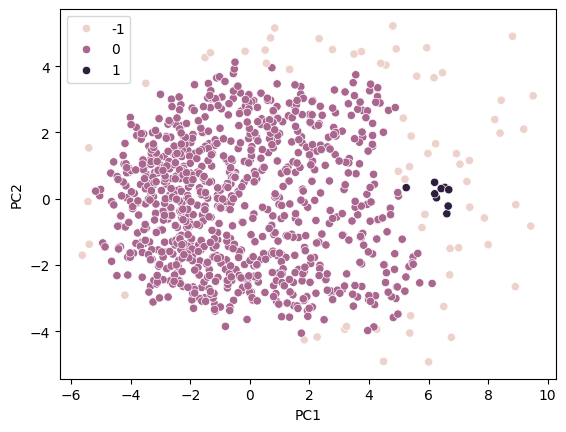

In [53]:
hdbscan_model = HDBSCAN(min_samples=10)

hdbscan_model.fit(basketball_pca_df)
preds_hdbscan = hdbscan_model.labels_

sns.scatterplot(x='PC1', y='PC2', data=basketball_pca_df, hue=preds_hdbscan)

### Experiments with the number of clusters

In [68]:
sse = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(basketball_pca_df)
    pred = kmeans.predict(basketball_pca_df)
    sse.append(kmeans.inertia_)
    score = silhouette_score(basketball_pca_df, pred)
    print(f"Silhouette Score: {score}")

Silhouette Score: 0.42723257625210587
Silhouette Score: 0.41545772942236214
Silhouette Score: 0.3938517051657304
Silhouette Score: 0.36796003050652326
Silhouette Score: 0.349552105369456
Silhouette Score: 0.35423985239284034
Silhouette Score: 0.32519755437210635
Silhouette Score: 0.3336902249799371
Silhouette Score: 0.35209018678230575


#### Elbow Method

- From this graphic we can see that 2 is optimal point for k in k means and also we can validate it with the silhoutte score

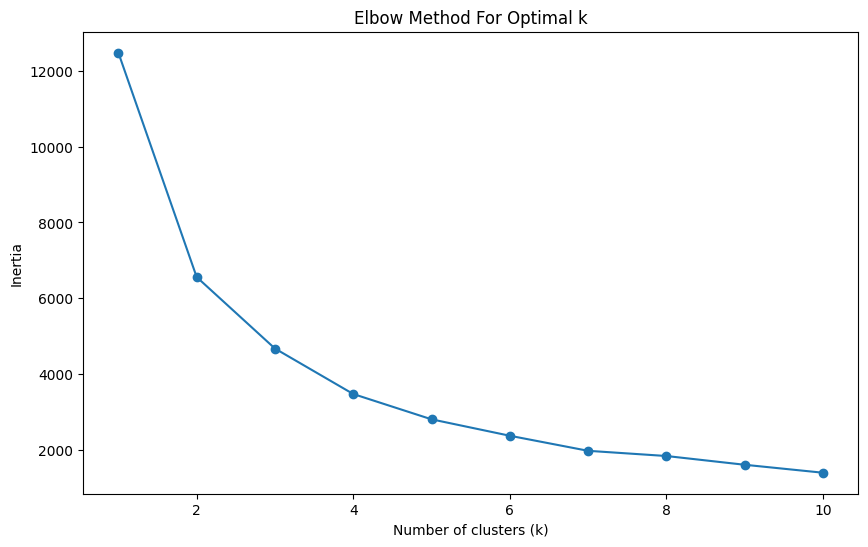

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### Evaluation

In [74]:
kmeans_silhouette = silhouette_score(basketball_pca_df, preds_kmeans)
agg_silhouette = silhouette_score(basketball_pca_df, preds_agg)
dbscan_silhouette = silhouette_score(basketball_pca_df, preds_dbscan)
hdbscan_silhouette = silhouette_score(basketball_pca_df, preds_hdbscan)

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"HDBSCAN Silhouette Score: {hdbscan_silhouette}")

KMeans Silhouette Score: 0.42723257625210587
Agglomerative Clustering Silhouette Score: 0.3962593298626429
DBSCAN Silhouette Score: 0.05174769449035298
HDBSCAN Silhouette Score: 0.2942392220766922


In [75]:
preds_kmeans

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [76]:
basketball_clean_df = cleaned_data.copy()
basketball_clean_df["Target"] = preds_kmeans

In [77]:
basketball_clean_df

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,1
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,1
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
987,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,0
988,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
989,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,0


In [78]:
y = basketball_clean_df['Target']
X_train, X_test, y_train, y_test = train_test_split(basketball_clean_df.drop(['Target'], axis=1), y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()

models = [random_forest, svm, knn, logistic_regression, decision_tree]

In [80]:
eval_values_df = pd.DataFrame(columns=['Model', 'Cross Validated Accuracy'],index=None)

In [81]:
def eval_model(model):
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    eval_values_df.loc[len(eval_values_df)] = [str(model), score.mean()]

In [84]:
for model in models:
    eval_model(model)
    
eval_values_df

,Model,Cross Validated Accuracy
0,RandomForestClassifier(),0.966792
1,SVC(),0.981243
2,KNeighborsClassifier(),0.959566
3,LogisticRegression(),0.994234
4,DecisionTreeClassifier(),0.930737
5,RandomForestClassifier(),0.968220
6,SVC(),0.981243
7,KNeighborsClassifier(),0.959566
8,LogisticRegression(),0.994234
9,DecisionTreeClassifier(),0.937984


In [86]:
models_params = {
    'svm': {
        'model': svm,
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': random_forest,
        'params' : {
            'n_estimators': range(1, 11)
        }
    },
    'logistic_regression' : {
        'model': logistic_regression,
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree': {
        'model': decision_tree,
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
    'knn': {
        'model': knn,
        'params': {
            'n_neighbors': range(1,25)
        }  
    }   
}

In [87]:
scores = []
tunned_models = {}

for model_name, model_params in models_params.items():
    grid_model =  GridSearchCV(model_params['model'], model_params['params'], cv=5, return_train_score=False)
    grid_model.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': grid_model.best_score_,
        'best_params': grid_model.best_params_
    })
    tunned_models[model_name] = grid_model.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.994234,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.965363,{'n_estimators': 9}
2,logistic_regression,0.995673,{'C': 5}
3,decision_tree,0.948014,{'criterion': 'entropy'}
4,knn,0.959598,{'n_neighbors': 11}


In [88]:
models_name = ["svm", "random_forest", "logistic_regression", "decision_tree", "knn"]

for model_name in models_name:
    y_pred = tunned_models[model_name].predict(X_test)
    print(f"Accuracy for {model_name} is {accuracy_score(y_test, y_pred)}")
    print(f"F1-Score for {model_name} is {f1_score(y_test, y_pred)}")
    print("--------------------------------------------------------------")
    


Accuracy for svm is 0.9832214765100671
F1-Score for svm is 0.9794238683127572
--------------------------------------------------------------
Accuracy for random_forest is 0.9563758389261745
F1-Score for random_forest is 0.9456066945606695
--------------------------------------------------------------
Accuracy for logistic_regression is 0.9899328859060402
F1-Score for logistic_regression is 0.9876543209876543
--------------------------------------------------------------
Accuracy for decision_tree is 0.9362416107382551
F1-Score for decision_tree is 0.9191489361702128
--------------------------------------------------------------
Accuracy for knn is 0.959731543624161
F1-Score for knn is 0.9487179487179487
--------------------------------------------------------------


In [89]:
final_model = tunned_models['logistic_regression']

final_model.predict(X_test)

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=i